# Lista 1

## Imports

In [253]:
import re

import pandas as pd
import matplotlib.pyplot as plt

## Questão 1

In [1]:
def validade_pass(password: str):
    if len(password) < 8:
        return False
    have_lowercase = False
    have_uppercase = False
    have_number = False
    have_special = False
    for character in password:
        if 'a' <= character <= 'z':
            have_lowercase = True
        elif 'A' <= character <= 'Z':
            have_uppercase = True
        elif '0' <= character <= '9':
            have_number = True
        else:
            have_special = True
    
    is_valid = have_lowercase and have_uppercase and have_number and have_special
    return is_valid

In [3]:
print(validade_pass('123dsad23132'))
print(validade_pass('123dsad23132#'))
print(validade_pass('12A3d2#'))
print(validade_pass('123dA2#'))
print(validade_pass('123dAaa2#'))

False
False
False
False
True


## Questão 2

In [251]:
def check_email(email):
    pattern = re.compile(r'([A-Za-z0-9]+[.-_])*[A-Za-z0-9]+@[A-Za-z0-9-]+(\.[A-Z|a-z]{2,})+')

    if re.fullmatch(pattern, email):
        return True
    return False 

In [252]:
print(check_email("gpss@ic.ufal.br"))
print(check_email("gps.@ic."))
print(check_email("gps.ic."))
print(check_email(".@gmail.com"))
print(check_email(".A@gmail.com"))
print(check_email("nome@gmail."))

True
False
False
False
False
False


## Questão 3

In [249]:
def get_metadata(apa_citation: str):
    authors = re.findall(r"[A-Z][a-z]+, [A-Z]\.(?: [A-Z]\.)?", apa_citation)
    year = re.search(r"([0-9]+)", apa_citation).group(0)
    title = re.search(r"(?<=\)\. )[A-Za-z :]+", apa_citation).group(0)
    publisher = re.search(r"(?<= )[A-Za-z :]+\.$", apa_citation).group(0)
    return authors, year, title, publisher

In [250]:
test_str = 'Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations: of statistical natural language processing. MIT press.'
authors, year, title, publisher = get_metadata(test_str)
print(authors)
print(year)
print(title)
print(publisher)

['Manning, C. D.', 'Manning, C. D.', 'Schutze, H.']
1999
Foundations: of statistical natural language processing
MIT press.


## Questão 4

In [254]:
data = pd.read_csv('../datasets/cyberbullying_tweets.csv')

In [255]:
data['comprimento'] = data['tweet_text'].apply(lambda x: len(x))

print("Comprimento dos tweets:")
print(data['comprimento'])

Comprimento dos tweets:
0         61
1        115
2         60
3        103
4        103
        ... 
47687    234
47688    276
47689    104
47690     90
47691     76
Name: comprimento, Length: 47692, dtype: int64


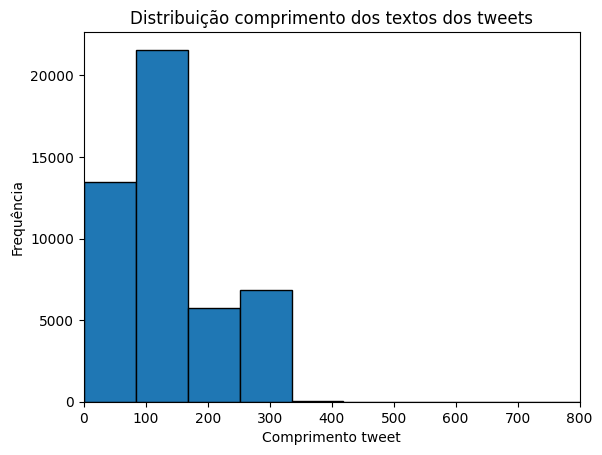

In [257]:
plt.hist(data['comprimento'], bins=60, edgecolor='black')
plt.xlabel('Comprimento tweet')
plt.ylabel('Frequência')
plt.title('Distribuição comprimento dos textos dos tweets')
plt.xlim(0, 800)

plt.show()

## Questão 5

## Questão 6

## Questão 7